<a href="https://colab.research.google.com/github/RajorshiAdhikaryProjects/Sgcc-Kmeans-Project/blob/main/Sgcc_Kmeans_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import os

warnings.filterwarnings("ignore")


In [25]:
# Step 1: Download and Extract the Dataset
!kaggle datasets download -d walagooose/sgcc-after-processing
with zipfile.ZipFile("sgcc-after-processing.zip", "r") as zip_ref:
    zip_ref.extractall(".")


Dataset URL: https://www.kaggle.com/datasets/walagooose/sgcc-after-processing
License(s): apache-2.0
sgcc-after-processing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
# Load the dataset
data = pd.read_csv("/content/after_preprocess_data.csv")
print("Dataset Loaded Successfully!")
print(data.head())


Dataset Loaded Successfully!
   2014/1/1  2014/1/2  2014/1/3  2014/1/4  2014/1/5  2014/1/6  2014/1/7  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.351925  0.393386  0.410168  0.514808  0.489141  0.519743  0.444225   
4  0.143286  0.180795  0.186047  0.308327  0.242311  0.243061  0.174794   

   2014/1/8  2014/1/9  2014/1/10  ...  2016/10/23  2016/10/24  2016/10/25  \
0  0.000000  0.000000   0.000000  ...    0.287242    0.300317    0.351030   
1  0.000000  0.000000   0.000000  ...    0.379613    0.340070    0.326011   
2  0.000000  0.000000   0.000000  ...    0.000000    0.000000    0.000000   
3  0.505429  0.498519   0.231491  ...    0.000000    0.000000    0.000000   
4  0.177044  0.348837   0.214554  ...    0.325581    0.081770    0.090773   

   2016/10/26  2016/10/27  2016/10/28  2016/10/29  2016/1

In [27]:
# Step 2: Exploratory Data Analysis (EDA)
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Shape: (42372, 1036)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, 2014/1/1 to 2016/11/1
dtypes: float64(1034), int64(2)
memory usage: 334.9 MB
None

Summary Statistics:
           2014/1/1      2014/1/2      2014/1/3      2014/1/4      2014/1/5  \
count  42372.000000  42372.000000  42372.000000  42372.000000  42372.000000   
mean       0.136357      0.133372      0.126770      0.132094      0.138071   
std        0.208620      0.200313      0.193551      0.198208      0.205641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.246654      0.243813      0.230387      0.240949      0.252311   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           2014/1/6      2014/1/7      20

In [28]:
# Step 3: Handling Missing Values (Imputation)
print("\nMissing Values Before Imputation:")
print(data.isnull().sum().sum())


Missing Values Before Imputation:
0


In [29]:
# Step 4: Feature Scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [30]:
# Step 5: Feature Selection using PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
data_pca = pd.DataFrame(pca.fit_transform(data_scaled))


In [31]:
# Standardizing PCA Component Names
data_pca.columns = [f"PCA_{i+1}" for i in range(data_pca.shape[1])]

In [32]:
# Step 6: Finding Optimal k using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_pca, labels))

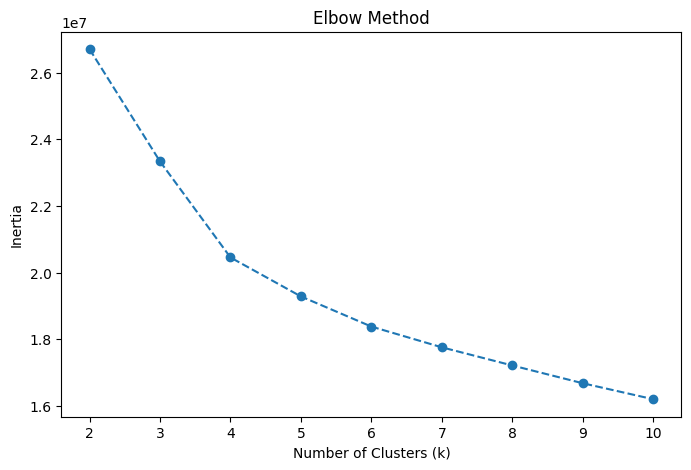

In [33]:
# Plot Elbow Method for Optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


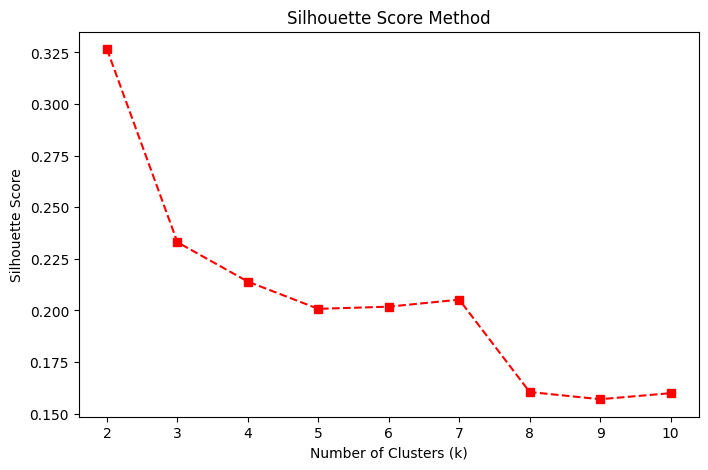

In [34]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method")
plt.show()

In [35]:
# Choosing the best k (from elbow method and silhouette score)
best_k = 3  # Manually select based on elbow plot and silhouette score
print(f"Best Number of Clusters: {best_k}")

Best Number of Clusters: 3


In [36]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data_pca['Cluster'] = final_kmeans.fit_predict(data_pca)

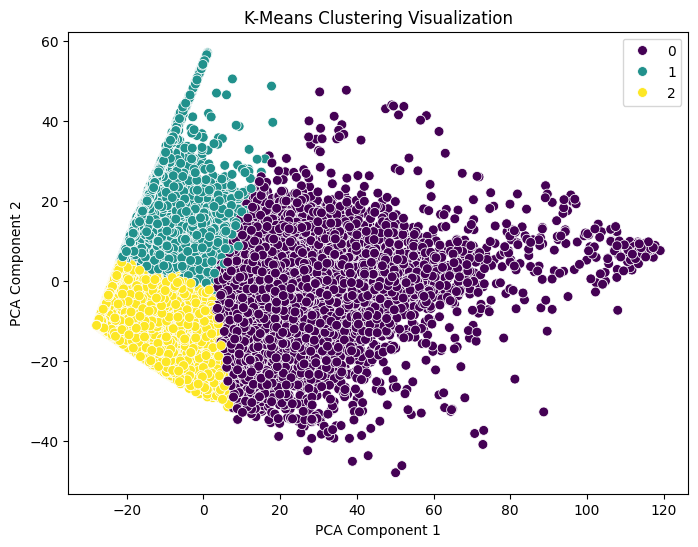

In [37]:
# Step 7: Visualizing the Clusters using PCA Projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca['PCA_1'], y=data_pca['PCA_2'], hue=data_pca['Cluster'], palette='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.show()

In [38]:
# Step 8: Cluster Interpretation
print("\nCluster Interpretation:")
for cluster in range(best_k):
    print(f"Cluster {cluster} Summary:")
    print(data[data_pca['Cluster'] == cluster].describe(), "\n")


Cluster Interpretation:
Cluster 0 Summary:
           2014/1/1      2014/1/2      2014/1/3      2014/1/4      2014/1/5  \
count  16440.000000  16440.000000  16440.000000  16440.000000  16440.000000   
mean       0.256858      0.248614      0.235818      0.245949      0.260758   
std        0.233933      0.221759      0.217254      0.220113      0.227418   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.246270      0.241263      0.226643      0.237719      0.253322   
75%        0.414710      0.394878      0.381289      0.392367      0.412664   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           2014/1/6      2014/1/7      2014/1/8      2014/1/9     2014/1/10  \
count  16440.000000  16440.000000  16440.000000  16440.000000  16440.000000   
mean       0.243109      0.236294      0.237398      0.240431      0.234374   
std    

In [39]:
# Cluster Center Analysis
print("Cluster Centers (in PCA space):\n", final_kmeans.cluster_centers_)

Cluster Centers (in PCA space):
 [[ 2.34104504e+01 -1.83578689e+00 -6.95513514e-01 ...  1.19216374e-03
   2.06640341e-04 -3.34457349e-03]
 [-1.14167061e+01  1.40192425e+01  2.31519149e+00 ... -2.70761932e-03
   1.96367515e-03  3.33314291e-03]
 [-1.73623299e+01 -8.29893786e+00 -9.38695068e-01 ...  6.80933420e-04
  -1.67287779e-03  1.22761477e-03]]


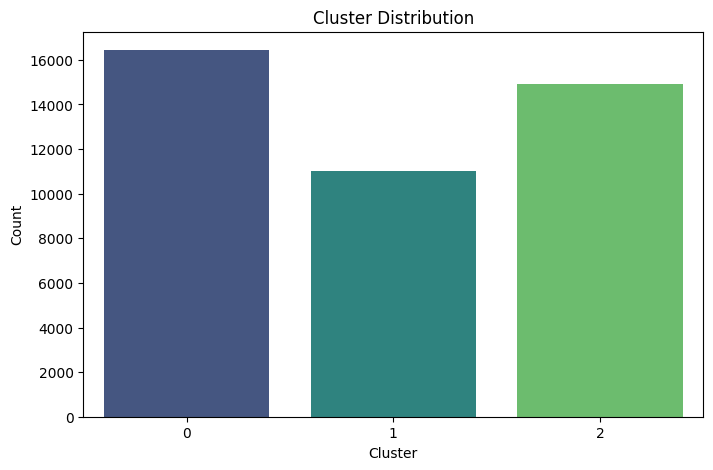

In [40]:
# Cluster Distribution Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x=data_pca['Cluster'], palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Cluster Distribution")
plt.show()

In [41]:
# Reconstructing Feature Contributions from PCA
inverse_pca = pca.inverse_transform(final_kmeans.cluster_centers_)
cluster_original_space = pd.DataFrame(inverse_pca, columns=data_scaled.columns)
print("Cluster Centers in Original Feature Space:\n", cluster_original_space)

Cluster Centers in Original Feature Space:
    2014/1/1  2014/1/2  2014/1/3  2014/1/4  2014/1/5  2014/1/6  2014/1/7  \
0  0.577392  0.575697  0.563154  0.574685  0.596204  0.576510  0.565128   
1 -0.403022 -0.397115 -0.387565 -0.402761 -0.420269 -0.409437 -0.392809   
2 -0.338830 -0.341312 -0.334537 -0.336042 -0.346840 -0.333136 -0.332849   

   2014/1/8  2014/1/9  2014/1/10  ...  2016/10/23  2016/10/24  2016/10/25  \
0  0.574482  0.556085   0.540303  ...    0.383589    0.384779    0.376204   
1 -0.396646 -0.384545  -0.379389  ...    0.510465    0.477865    0.490303   
2 -0.340320 -0.328980  -0.315405  ...   -0.797936   -0.775249   -0.774967   

   2016/10/26  2016/10/27  2016/10/28  2016/10/29  2016/10/30  2016/10/31  \
0    0.374315    0.372984    0.369563    0.384812    0.378941    0.372582   
1    0.497648    0.506023    0.508988    0.470513    0.467316    0.457879   
2   -0.778294   -0.782994   -0.781411   -0.769873   -0.761058   -0.747114   

   2016/11/1  
0        0.0  
1      

In [42]:
# Saving Cluster Assignments to Original Data
data['Cluster'] = data_pca['Cluster']
data.to_csv("clustered_data.csv", index=False)
print("Clustered data saved as clustered_data.csv")


Clustered data saved as clustered_data.csv


In [43]:
# Step 9: Saving the Model and Preprocessing Pipeline
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(final_kmeans, file)

with open("preprocessing_pipeline.pkl", "wb") as file:
    pickle.dump((scaler, pca), file)

print("K-Means model and preprocessing pipeline saved.")


K-Means model and preprocessing pipeline saved.


In [44]:
# Conclusion
print("K-Means clustering applied successfully with optimal k.")
print(f"Final silhouette score: {silhouette_score(data_pca.drop(columns=['Cluster']), data_pca['Cluster']):.3f}")
print("Project completed with all efficiency improvements!")

K-Means clustering applied successfully with optimal k.
Final silhouette score: 0.233
Project completed with all efficiency improvements!
